<a href="https://colab.research.google.com/github/albim72/BOOTCAMP_PYTHON_II/blob/main/autokoder_kolorowanie_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

kolorująca sieć autokodująca
dane wejściowe: obrazy monochromatyczne oraz kolorowe
Algorytm będzie zaszumiał obraz poprzez modyfikację pikseli (zmiana parametrów koloru)

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function


In [5]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.layers import Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

In [6]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [7]:
def rgb2gray(rgb):
  """
  konwersja obrazu w RGB do skali szarości
  skala szarości = 0.299*R + 0.587*G + 0.114*B
  argumenty: rgb -> tensor
  zwraca: obraz w skali szarości
  """
  return np.dot(rgb[...,:3],[0.299,0.587,0.114])

In [8]:
(x_train, _),(x_test, _) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [12]:
#wprowadzenie wymiarów obrazu
img_rows = x_train.shape[1]
img_cols = x_train.shape[2]
channels = x_train.shape[3]

In [13]:
#utworzenie folderu zapisane_obrazy
imgs_dir = 'zapisane_obrazy'
save_dir = os.path.join(os.getcwd(),imgs_dir)
if not os.path.isdir(save_dir):
  os.makedirs(save_dir)

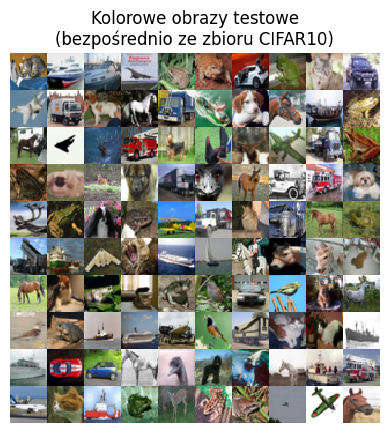

In [14]:
#wyświetlenie pierwszych 100 obrazów wejściowych (kolorowe i monochromia)
imgs = x_test[:100]
imgs = imgs.reshape((10,10,img_rows,img_cols,channels))
imgs = np.vstack([np.hstack(i) for i in imgs])
plt.figure()
plt.axis('off')
plt.title('Kolorowe obrazy testowe\n(bezpośrednio ze zbioru CIFAR10)')
plt.imshow(imgs, interpolation='none')
plt.savefig('%s/test_color.png' % imgs_dir)
plt.savefig('%s/test_color.tif' % imgs_dir)
plt.show()